In [341]:
import xarray as xr #Similar ao pandas mas com melhor eficiencia para trabalhar com matrizes multidimensionais, muito bom para dados georref
import numpy as np
from scipy.stats import weibull_min
from py_wake.site.xrsite import XRSite
from py_wake.site.shear import PowerShear
import matplotlib.pyplot as plt
from py_wake.flow_map import XYGrid, YZGrid, XZGrid
from pyproj import Proj, Transformer
from py_wake.wind_turbines import WindTurbine
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
import pandas as pd
from topfarm.utils import regular_generic_layout, regular_generic_layout_gradients
import topfarm
from scipy.stats import weibull_min
import os
import numpy as np
import matplotlib.pyplot as plt
from py_wake.wind_turbines import WindTurbine, WindTurbines
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
import pandas as pd

In [342]:
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
import pandas as pd

u= [0,3,5,7,9,11,13,15,17,19,21]
ct= [0,8/9,8/9,8/9,8/9,8/9,8/9,8/9,8/9,8/9,8]
power= [0,0,0,0,0,0,49, 127, 224, 339, 480]

turbina= WindTurbine(name='MyWT',
                    diameter=136,
                    hub_height=100,
                    powerCtFunction=PowerCtTabular(u,power,'kW',ct))

In [343]:
f = [0.036, 0.039, 0.052, 0.07, 0.084, 0.064, 0.086, 0.118, 0.152, 0.147, 0.1, 0.052]
A = [9.177, 9.782, 9.532, 9.91, 10.043, 9.594, 9.584, 10.515, 11.399, 11.687, 11.637, 10.088]
k = [2.393, 2.447, 2.412, 2.592, 2.756, 2.596, 2.584, 2.549, 2.471, 2.607, 2.627, 2.326]
wd = np.linspace(0, 360, len(f), endpoint=False)
ti = .1

In [344]:
Weibull_A = np.array(A)
Weibull_k = np.array(k)
#Configura o  Turbulence intensity - TI, e 
#ti = 0.1 # Desvio padrão da velocidade do vento / Velocidade média do vento
#Gera o vetor de direção "referencia"

site_1 = xr.Dataset(
    data_vars={
        'Sector_frequency': ('wd', f),
        'Weibull_A': ('wd', Weibull_A),
        'Weibull_k': ('wd', Weibull_k),
        'TI': (ti)   #colocar uma lista
    },
    coords={
        'wd': wd,
    }
)

In [345]:
from py_wake import NOJ
windTurbines = turbina
site = XRSite(site_1)

In [346]:
from py_wake.wind_farm_models import All2AllIterative
from py_wake.superposition_models import MaxSum, WeightedSum
from py_wake.deficit_models import BastankhahGaussianDeficit, FugaDeficit, NiayifarGaussianDeficit

wf_model = All2AllIterative(site, turbina,
                            wake_deficitModel=FugaDeficit(),
                            superpositionModel=MaxSum(),
                            blockage_deficitModel=FugaDeficit())

In [347]:
layout_x=[420, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]
layout_y=[0,210,410,610,810,1010,1210,1410,1610,1810]

In [348]:
simulaçaoResult = wf_model(layout_x, layout_y, wd=150)

In [349]:
simulaçaoResult

<xarray.SimulationResult> Size: 9kB
Dimensions:           (wt: 10, wd: 1, ws: 23)
Coordinates:
  * ws                (ws) int64 184B 3 4 5 6 7 8 9 10 ... 19 20 21 22 23 24 25
  * wt                (wt) int64 80B 0 1 2 3 4 5 6 7 8 9
  * wd                (wd) int64 8B 150
    type              (wt) int64 80B 0 0 0 0 0 0 0 0 0 0
Data variables: (12/17)
    WS_eff            (wt, wd, ws) float64 2kB 2.988 3.983 4.979 ... 24.0 25.0
    TI_eff            (wt, wd, ws) float64 2kB 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1
    Power             (wt, wd, ws) float64 2kB 0.0 0.0 0.0 ... 4.8e+05 4.8e+05
    CT                (wt, wd, ws) float64 2kB 0.8852 0.8889 0.8889 ... 8.0 8.0
    h                 (wt) float64 80B 100.0 100.0 100.0 ... 100.0 100.0 100.0
    x                 (wt) int64 80B 420 200 400 600 800 ... 1200 1400 1600 1800
    ...                ...
    ws_l              (ws) float64 184B 2.5 3.5 4.5 5.5 ... 21.5 22.5 23.5 24.5
    ws_u              (ws) float64 184B 3.5 4.5 5.5 6.5 ... 22.5 23.5 24.5 25.5
    Weibull_A         float64 8B 9.594
    Weibull_k         float64 8B 2.596
    Sector_frequency  float64 8B 0.768
    P                 (ws) float64 184B 0.031 0.04636 ... 1.903e-05 6.114e-06

In [350]:
simulaçaoResult['WS_eff']

<xarray.DataArray 'WS_eff' (wt: 10, wd: 1, ws: 23)> Size: 2kB
array([[[ 2.98764741,  3.98310864,  4.97888579,  5.97466295,
          6.97044011,  7.96621727,  8.96199443,  9.95777159,
         10.95354875, 11.94932591, 12.94510306, 13.94088022,
         14.93665738, 15.93243454, 16.9282117 , 17.92398886,
         18.91976602, 19.76371239, 20.55882   , 21.49259504,
         22.46953118, 23.44646732, 24.42340346]],

       [[ 2.92461178,  3.89910125,  4.87387656,  5.84865187,
          6.82342719,  7.7982025 ,  8.77297781,  9.74775312,
         10.72252843, 11.69730375, 12.67207906, 13.64685437,
         14.62162968, 15.596405  , 16.57118031, 17.54595562,
         18.52073093, 17.97259828, 17.26878063, 17.18826771,
         17.9695526 , 18.7508375 , 19.5321224 ]],

       [[ 2.99637316,  3.99515838,  4.99394797,  5.99273756,
          6.99152716,  7.99031675,  8.98910635,  9.98789594,
         10.98668553, 11.98547513, 12.98426472, 13.98305432,
         14.98184391, 15.9806335 , 16.9794231 , 17.97821269,
         18.97700229, 19.89050326, 20.79555519, 21.76486629,
         22.7541784 , 23.7434905 , 24.7328026 ]],
...
       [[ 2.99637321,  3.9951584 ,  4.99394801,  5.99273761,
          6.99152721,  7.99031681,  8.98910641,  9.98789601,
         10.98668561, 11.98547521, 12.98426481, 13.98305442,
         14.98184402, 15.98063362, 16.97942322, 17.97821282,
         18.97700242, 19.89176869, 20.79852446, 21.76497664,
         22.75429376, 23.74361088, 24.732928  ]],

       [[ 2.99635998,  3.99514663,  4.99393329,  5.99271995,
          6.99150661,  7.99029327,  8.98907993,  9.98786658,
         10.98665324, 11.9854399 , 12.98422656, 13.98301322,
         14.98179988, 15.98058654, 16.97937319, 17.97815985,
         18.97694651, 19.87866585, 20.77067845, 21.75975838,
         22.74883831, 23.73791823, 24.72699816]],

       [[ 3.        ,  4.        ,  5.        ,  6.        ,
          7.        ,  8.        ,  9.        , 10.        ,
         11.        , 12.        , 13.        , 14.        ,
         15.        , 16.        , 17.        , 18.        ,
         19.        , 20.        , 21.        , 22.        ,
         23.        , 24.        , 25.        ]]])
Coordinates:
  * ws       (ws) int64 184B 3 4 5 6 7 8 9 10 11 ... 17 18 19 20 21 22 23 24 25
  * wt       (wt) int64 80B 0 1 2 3 4 5 6 7 8 9
  * wd       (wd) int64 8B 150
    type     (wt) int64 80B 0 0 0 0 0 0 0 0 0 0
Attributes:
    Description:  Effective local wind speed [m/s]

In [351]:
maior_f= f.index(max(f))

In [352]:
valor_A= A[maior_f]
valor_k= k[maior_f]

In [353]:
valor_A

11.399

In [354]:
valor_k

2.471

In [355]:
x=np.arange(0,26,1)

In [356]:
weibull_min.pdf(x, valor_k, scale=valor_A)

array([0.        , 0.00602966, 0.01653028, 0.02931968, 0.04308536,
       0.0566058 , 0.0687194 , 0.07840185, 0.08486897, 0.08766605,
       0.08671841, 0.08232859, 0.07511796, 0.0659235 , 0.05567013,
       0.04524329, 0.03538473, 0.02662722, 0.01927334, 0.01341371,
       0.00897254, 0.00576569, 0.00355744, 0.00210642, 0.00119628,
       0.00065127])

In [357]:
y=weibull_min.pdf(x, valor_k, scale=valor_A)

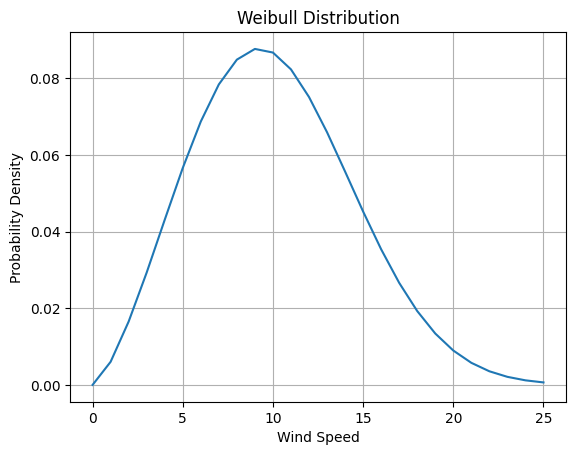

In [358]:
plt.plot(weibull_min.pdf(x, valor_k, scale=valor_A))
plt.xlabel('Wind Speed')
plt.ylabel('Probability Density')
plt.title('Weibull Distribution')
plt.grid(True)
plt.show()

In [359]:
indice= np.argmax(y)

In [360]:
indice

np.int64(9)

In [361]:
maior_weibull=y[indice]

In [362]:
maior_weibull

np.float64(0.08766604519752036)

In [363]:
valor_anterior=y[indice-1]

In [364]:
valor_anterior

np.float64(0.08486897441004929)

In [365]:
valor_depois=y[indice+1]

In [366]:
valor_depois

np.float64(0.08671841055204581)

In [367]:
soma=maior_weibull + valor_anterior + valor_depois
soma

np.float64(0.25925343015961544)

In [368]:
ws_eff_mult_maior = simulaçaoResult['WS_eff'] * maior_weibull
ws_eff_mult_maior

<xarray.DataArray 'WS_eff' (wt: 10, wd: 1, ws: 23)> Size: 2kB
array([[[0.26191523, 0.34918338, 0.43647923, 0.52377507, 0.61107092,
         0.69836676, 0.78566261, 0.87295845, 0.9602543 , 1.04755014,
         1.13484599, 1.22214184, 1.30943768, 1.39673353, 1.48402937,
         1.57132522, 1.65862106, 1.7326065 , 1.80231044, 1.88417081,
         1.96981494, 2.05545906, 2.14110319]],

       [[0.25638915, 0.34181879, 0.42727348, 0.51272818, 0.59818288,
         0.68363757, 0.76909227, 0.85454697, 0.94000166, 1.02545636,
         1.11091106, 1.19636575, 1.28182045, 1.36727515, 1.45272984,
         1.53818454, 1.62363923, 1.57558661, 1.5138857 , 1.50682745,
         1.57531961, 1.64381177, 1.71230392]],

       [[0.26268018, 0.35023973, 0.43779967, 0.5253596 , 0.61291954,
         0.70047947, 0.7880394 , 0.87559934, 0.96315927, 1.0507192 ,
         1.13827914, 1.22583907, 1.31339901, 1.40095894, 1.48851887,
         1.57607881, 1.66363874, 1.74372176, 1.82306408, 1.90803975,
         1.99476883, 2.08149791, 2.16822699]],

       [[0.26268018, 0.35023973, 0.43779967, 0.5253596 , 0.61291954,
         0.70047947, 0.7880394 , 0.87559934, 0.96315927, 1.0507192 ,
...
         1.57607881, 1.66363874, 1.74370989, 1.82303294, 1.90803954,
         1.99476861, 2.08149768, 2.16822675]],

       [[0.26268019, 0.35023974, 0.43779967, 0.52535961, 0.61291954,
         0.70047947, 0.78803941, 0.87559934, 0.96315928, 1.05071921,
         1.13827915, 1.22583908, 1.31339901, 1.40095895, 1.48851888,
         1.57607882, 1.66363875, 1.74383269, 1.82332439, 1.90804943,
         1.99477895, 2.08150846, 2.16823798]],

       [[0.26267903, 0.35023871, 0.43779838, 0.52535806, 0.61291773,
         0.70047741, 0.78803709, 0.87559676, 0.96315644, 1.05071612,
         1.13827579, 1.22583547, 1.31339515, 1.40095482, 1.4885145 ,
         1.57607417, 1.66363385, 1.74268402, 1.82088324, 1.90759196,
         1.99430069, 2.08100941, 2.16771814]],

       [[0.26299814, 0.35066418, 0.43833023, 0.52599627, 0.61366232,
         0.70132836, 0.78899441, 0.87666045, 0.9643265 , 1.05199254,
         1.13965859, 1.22732463, 1.31499068, 1.40265672, 1.49032277,
         1.57798881, 1.66565486, 1.7533209 , 1.84098695, 1.92865299,
         2.01631904, 2.10398508, 2.19165113]]])
Coordinates:
  * ws       (ws) int64 184B 3 4 5 6 7 8 9 10 11 ... 17 18 19 20 21 22 23 24 25
  * wt       (wt) int64 80B 0 1 2 3 4 5 6 7 8 9
  * wd       (wd) int64 8B 150
    type     (wt) int64 80B 0 0 0 0 0 0 0 0 0 0

In [369]:
ws_eff_mult_anterior = simulaçaoResult['WS_eff'] * valor_anterior
ws_eff_mult_anterior

<xarray.DataArray 'WS_eff' (wt: 10, wd: 1, ws: 23)> Size: 2kB
array([[[0.25355857, 0.33804234, 0.42255293, 0.50706352, 0.5915741 ,
         0.67608469, 0.76059528, 0.84510586, 0.92961645, 1.01412703,
         1.09863762, 1.18314821, 1.26765879, 1.35216938, 1.43667997,
         1.52119055, 1.60570114, 1.677326  , 1.74480597, 1.8240545 ,
         1.90696607, 1.98987763, 2.0727892 ]],

       [[0.2482088 , 0.33091272, 0.41364091, 0.49636909, 0.57909727,
         0.66182545, 0.74455363, 0.82728181, 0.91000999, 0.99273817,
         1.07546635, 1.15819453, 1.24092272, 1.3236509 , 1.40637908,
         1.48910726, 1.57183544, 1.52531598, 1.4655837 , 1.45875065,
         1.5250575 , 1.59136435, 1.6576712 ]],

       [[0.25429912, 0.33906499, 0.42383124, 0.50859749, 0.59336374,
         0.67812999, 0.76289624, 0.84766248, 0.93242873, 1.01719498,
         1.10196123, 1.18672748, 1.27149373, 1.35625998, 1.44102622,
         1.52579247, 1.61055872, 1.68808661, 1.76489744, 1.84716188,
         1.93112378, 2.01508569, 2.09904759]],

       [[0.25429912, 0.33906499, 0.42383124, 0.50859749, 0.59336374,
         0.67812999, 0.76289624, 0.84766248, 0.93242873, 1.01719498,
...
         1.52579247, 1.61055872, 1.68807512, 1.7648673 , 1.84716168,
         1.93112357, 2.01508547, 2.09904736]],

       [[0.25429912, 0.339065  , 0.42383125, 0.50859749, 0.59336374,
         0.67812999, 0.76289624, 0.84766249, 0.93242874, 1.01719499,
         1.10196124, 1.18672749, 1.27149374, 1.35625999, 1.44102623,
         1.52579248, 1.61055873, 1.68819401, 1.76514944, 1.84717125,
         1.93113358, 2.0150959 , 2.09905823]],

       [[0.254298  , 0.339064  , 0.42383   , 0.508596  , 0.593362  ,
         0.67812799, 0.76289399, 0.84765999, 0.93242599, 1.01719199,
         1.10195799, 1.18672399, 1.27148999, 1.35625599, 1.44102199,
         1.52578799, 1.61055399, 1.68708198, 1.76278618, 1.84672838,
         1.93067058, 2.01461278, 2.09855497]],

       [[0.25460692, 0.3394759 , 0.42434487, 0.50921385, 0.59408282,
         0.6789518 , 0.76382077, 0.84868974, 0.93355872, 1.01842769,
         1.10329667, 1.18816564, 1.27303462, 1.35790359, 1.44277256,
         1.52764154, 1.61251051, 1.69737949, 1.78224846, 1.86711744,
         1.95198641, 2.03685539, 2.12172436]]])
Coordinates:
  * ws       (ws) int64 184B 3 4 5 6 7 8 9 10 11 ... 17 18 19 20 21 22 23 24 25
  * wt       (wt) int64 80B 0 1 2 3 4 5 6 7 8 9
  * wd       (wd) int64 8B 150
    type     (wt) int64 80B 0 0 0 0 0 0 0 0 0 0

In [370]:
ws_eff_mult_depois = simulaçaoResult['WS_eff'] * valor_depois
ws_eff_mult_depois

<xarray.DataArray 'WS_eff' (wt: 10, wd: 1, ws: 23)> Size: 2kB
array([[[0.25908404, 0.34540885, 0.43176106, 0.51811327, 0.60446549,
         0.6908177 , 0.77716991, 0.86352212, 0.94987434, 1.03622655,
         1.12257876, 1.20893097, 1.29528319, 1.3816354 , 1.46798761,
         1.55433982, 1.64069204, 1.71387773, 1.78282819, 1.86380368,
         1.94852203, 2.03324038, 2.11795873]],

       [[0.25361768, 0.33812386, 0.42265483, 0.50718579, 0.59171676,
         0.67624773, 0.76077869, 0.84530966, 0.92984062, 1.01437159,
         1.09890255, 1.18343352, 1.26796449, 1.35249545, 1.43702642,
         1.52155738, 1.60608835, 1.55855516, 1.49752121, 1.49053926,
         1.55829104, 1.62604282, 1.69379461]],

       [[0.25984072, 0.34645378, 0.43306723, 0.51968068, 0.60629412,
         0.69290757, 0.77952101, 0.86613446, 0.95274791, 1.03936135,
         1.1259748 , 1.21258824, 1.29920169, 1.38581514, 1.47242858,
         1.55904203, 1.64565548, 1.72487283, 1.80335749, 1.88741461,
         1.97320618, 2.05899776, 2.14478933]],

       [[0.25984072, 0.34645378, 0.43306723, 0.51968068, 0.60629412,
         0.69290757, 0.77952101, 0.86613446, 0.95274791, 1.03936135,
...
         1.55904203, 1.64565548, 1.72486108, 1.80332669, 1.8874144 ,
         1.97320597, 2.05899753, 2.1447891 ]],

       [[0.25984072, 0.34645379, 0.43306723, 0.51968068, 0.60629413,
         0.69290757, 0.77952102, 0.86613447, 0.95274791, 1.03936136,
         1.12597481, 1.21258825, 1.2992017 , 1.38581515, 1.47242859,
         1.55904204, 1.64565549, 1.72498256, 1.80361498, 1.88742418,
         1.97321619, 2.0590082 , 2.1448002 ]],

       [[0.25983957, 0.34645277, 0.43306596, 0.51967915, 0.60629234,
         0.69290553, 0.77951872, 0.86613192, 0.95274511, 1.0393583 ,
         1.12597149, 1.21258468, 1.29919787, 1.38581106, 1.47242426,
         1.55903745, 1.64565064, 1.72384631, 1.80120022, 1.88697166,
         1.9727431 , 2.05851454, 2.14428598]],

       [[0.26015523, 0.34687364, 0.43359205, 0.52031046, 0.60702887,
         0.69374728, 0.78046569, 0.86718411, 0.95390252, 1.04062093,
         1.12733934, 1.21405775, 1.30077616, 1.38749457, 1.47421298,
         1.56093139, 1.6476498 , 1.73436821, 1.82108662, 1.90780503,
         1.99452344, 2.08124185, 2.16796026]]])
Coordinates:
  * ws       (ws) int64 184B 3 4 5 6 7 8 9 10 11 ... 17 18 19 20 21 22 23 24 25
  * wt       (wt) int64 80B 0 1 2 3 4 5 6 7 8 9
  * wd       (wd) int64 8B 150
    type     (wt) int64 80B 0 0 0 0 0 0 0 0 0 0

In [ ]:
(ws_eff_mult_maior + ws_eff_mult_anterior + ws_eff_mult_depois)

<xarray.DataArray 'WS_eff' (wt: 10, wd: 1, ws: 23)> Size: 2kB
array([[[0.77455784, 1.03263458, 1.29079322, 1.54895186, 1.80711051,
         2.06526915, 2.3234278 , 2.58158644, 2.83974508, 3.09790373,
         3.35606237, 3.61422102, 3.87237966, 4.13053831, 4.38869695,
         4.64685559, 4.90501424, 5.12381023, 5.3299446 , 5.57202899,
         5.82530303, 6.07857708, 6.33185112]],

       [[0.75821564, 1.01085537, 1.26356922, 1.51628306, 1.7689969 ,
         2.02171075, 2.27442459, 2.52713843, 2.77985228, 3.03256612,
         3.28527996, 3.53799381, 3.79070765, 4.04342149, 4.29613534,
         4.54884918, 4.80156302, 4.65945775, 4.47699061, 4.45611736,
         4.65866815, 4.86121894, 5.06376973]],

       [[0.77682002, 1.03575851, 1.29469814, 1.55363777, 1.8125774 ,
         2.07151703, 2.33045665, 2.58939628, 2.84833591, 3.10727554,
         3.36621517, 3.6251548 , 3.88409442, 4.14303405, 4.40197368,
         4.66091331, 4.91985294, 5.1566812 , 5.39131901, 5.64261624,
         5.8990988 , 6.15558136, 6.41206391]],

       [[0.77682002, 1.03575851, 1.29469814, 1.55363777, 1.8125774 ,
         2.07151703, 2.33045665, 2.58939628, 2.84833591, 3.10727554,
...
         4.66091331, 4.91985294, 5.15664609, 5.39122693, 5.64261562,
         5.89909815, 6.15558068, 6.41206321]],

       [[0.77682003, 1.03575852, 1.29469815, 1.55363778, 1.81257741,
         2.07151704, 2.33045667, 2.5893963 , 2.84833593, 3.10727556,
         3.36621519, 3.62515482, 3.88409445, 4.14303408, 4.40197371,
         4.66091334, 4.91985297, 5.15700927, 5.39208881, 5.64264485,
         5.89912871, 6.15561257, 6.41209642]],

       [[0.7768166 , 1.03575547, 1.29469434, 1.5536332 , 1.81257207,
         2.07151094, 2.3304498 , 2.58938867, 2.84832754, 3.10726641,
         3.36620527, 3.62514414, 3.88408301, 4.14302188, 4.40196074,
         4.66089961, 4.91983848, 5.15361231, 5.38486964, 5.641292  ,
         5.89771436, 6.15413673, 6.41055909]],

       [[0.77776029, 1.03701372, 1.29626715, 1.55552058, 1.81477401,
         2.07402744, 2.33328087, 2.5925343 , 2.85178773, 3.11104116,
         3.37029459, 3.62954802, 3.88880145, 4.14805488, 4.40730831,
         4.66656174, 4.92581517, 5.1850686 , 5.44432203, 5.70357546,
         5.96282889, 6.22208232, 6.48133575]]])
Coordinates:
  * ws       (ws) int64 184B 3 4 5 6 7 8 9 10 11 ... 17 18 19 20 21 22 23 24 25
  * wt       (wt) int64 80B 0 1 2 3 4 5 6 7 8 9
  * wd       (wd) int64 8B 150
    type     (wt) int64 80B 0 0 0 0 0 0 0 0 0 0

In [371]:
media_ponderada = (ws_eff_mult_maior + ws_eff_mult_anterior + ws_eff_mult_depois) / soma
media_ponderada

<xarray.DataArray 'WS_eff' (wt: 10, wd: 1, ws: 23)> Size: 2kB
array([[[ 2.98764741,  3.98310864,  4.97888579,  5.97466295,
          6.97044011,  7.96621727,  8.96199443,  9.95777159,
         10.95354875, 11.94932591, 12.94510306, 13.94088022,
         14.93665738, 15.93243454, 16.9282117 , 17.92398886,
         18.91976602, 19.76371239, 20.55882   , 21.49259504,
         22.46953118, 23.44646732, 24.42340346]],

       [[ 2.92461178,  3.89910125,  4.87387656,  5.84865187,
          6.82342719,  7.7982025 ,  8.77297781,  9.74775312,
         10.72252843, 11.69730375, 12.67207906, 13.64685437,
         14.62162968, 15.596405  , 16.57118031, 17.54595562,
         18.52073093, 17.97259828, 17.26878063, 17.18826771,
         17.9695526 , 18.7508375 , 19.5321224 ]],

       [[ 2.99637316,  3.99515838,  4.99394797,  5.99273756,
          6.99152716,  7.99031675,  8.98910635,  9.98789594,
         10.98668553, 11.98547513, 12.98426472, 13.98305432,
         14.98184391, 15.9806335 , 16.9794231 , 17.97821269,
         18.97700229, 19.89050326, 20.79555519, 21.76486629,
         22.7541784 , 23.7434905 , 24.7328026 ]],
...
       [[ 2.99637321,  3.9951584 ,  4.99394801,  5.99273761,
          6.99152721,  7.99031681,  8.98910641,  9.98789601,
         10.98668561, 11.98547521, 12.98426481, 13.98305442,
         14.98184402, 15.98063362, 16.97942322, 17.97821282,
         18.97700242, 19.89176869, 20.79852446, 21.76497664,
         22.75429376, 23.74361088, 24.732928  ]],

       [[ 2.99635998,  3.99514663,  4.99393329,  5.99271995,
          6.99150661,  7.99029327,  8.98907993,  9.98786658,
         10.98665324, 11.9854399 , 12.98422656, 13.98301322,
         14.98179988, 15.98058654, 16.97937319, 17.97815985,
         18.97694651, 19.87866585, 20.77067845, 21.75975838,
         22.74883831, 23.73791823, 24.72699816]],

       [[ 3.        ,  4.        ,  5.        ,  6.        ,
          7.        ,  8.        ,  9.        , 10.        ,
         11.        , 12.        , 13.        , 14.        ,
         15.        , 16.        , 17.        , 18.        ,
         19.        , 20.        , 21.        , 22.        ,
         23.        , 24.        , 25.        ]]])
Coordinates:
  * ws       (ws) int64 184B 3 4 5 6 7 8 9 10 11 ... 17 18 19 20 21 22 23 24 25
  * wt       (wt) int64 80B 0 1 2 3 4 5 6 7 8 9
  * wd       (wd) int64 8B 150
    type     (wt) int64 80B 0 0 0 0 0 0 0 0 0 0

In [372]:
simulacao=simulaçaoResult
simulacao['WS_eff']=media_ponderada

In [373]:
media_ponderada

<xarray.DataArray 'WS_eff' (wt: 10, wd: 1, ws: 23)> Size: 2kB
array([[[ 2.98764741,  3.98310864,  4.97888579,  5.97466295,
          6.97044011,  7.96621727,  8.96199443,  9.95777159,
         10.95354875, 11.94932591, 12.94510306, 13.94088022,
         14.93665738, 15.93243454, 16.9282117 , 17.92398886,
         18.91976602, 19.76371239, 20.55882   , 21.49259504,
         22.46953118, 23.44646732, 24.42340346]],

       [[ 2.92461178,  3.89910125,  4.87387656,  5.84865187,
          6.82342719,  7.7982025 ,  8.77297781,  9.74775312,
         10.72252843, 11.69730375, 12.67207906, 13.64685437,
         14.62162968, 15.596405  , 16.57118031, 17.54595562,
         18.52073093, 17.97259828, 17.26878063, 17.18826771,
         17.9695526 , 18.7508375 , 19.5321224 ]],

       [[ 2.99637316,  3.99515838,  4.99394797,  5.99273756,
          6.99152716,  7.99031675,  8.98910635,  9.98789594,
         10.98668553, 11.98547513, 12.98426472, 13.98305432,
         14.98184391, 15.9806335 , 16.9794231 , 17.97821269,
         18.97700229, 19.89050326, 20.79555519, 21.76486629,
         22.7541784 , 23.7434905 , 24.7328026 ]],
...
       [[ 2.99637321,  3.9951584 ,  4.99394801,  5.99273761,
          6.99152721,  7.99031681,  8.98910641,  9.98789601,
         10.98668561, 11.98547521, 12.98426481, 13.98305442,
         14.98184402, 15.98063362, 16.97942322, 17.97821282,
         18.97700242, 19.89176869, 20.79852446, 21.76497664,
         22.75429376, 23.74361088, 24.732928  ]],

       [[ 2.99635998,  3.99514663,  4.99393329,  5.99271995,
          6.99150661,  7.99029327,  8.98907993,  9.98786658,
         10.98665324, 11.9854399 , 12.98422656, 13.98301322,
         14.98179988, 15.98058654, 16.97937319, 17.97815985,
         18.97694651, 19.87866585, 20.77067845, 21.75975838,
         22.74883831, 23.73791823, 24.72699816]],

       [[ 3.        ,  4.        ,  5.        ,  6.        ,
          7.        ,  8.        ,  9.        , 10.        ,
         11.        , 12.        , 13.        , 14.        ,
         15.        , 16.        , 17.        , 18.        ,
         19.        , 20.        , 21.        , 22.        ,
         23.        , 24.        , 25.        ]]])
Coordinates:
  * ws       (ws) int64 184B 3 4 5 6 7 8 9 10 11 ... 17 18 19 20 21 22 23 24 25
  * wt       (wt) int64 80B 0 1 2 3 4 5 6 7 8 9
  * wd       (wd) int64 8B 150
    type     (wt) int64 80B 0 0 0 0 0 0 0 0 0 0

In [374]:
simulaçaoResult

<xarray.SimulationResult> Size: 9kB
Dimensions:           (wt: 10, wd: 1, ws: 23)
Coordinates:
  * ws                (ws) int64 184B 3 4 5 6 7 8 9 10 ... 19 20 21 22 23 24 25
  * wt                (wt) int64 80B 0 1 2 3 4 5 6 7 8 9
  * wd                (wd) int64 8B 150
    type              (wt) int64 80B 0 0 0 0 0 0 0 0 0 0
Data variables: (12/17)
    WS_eff            (wt, wd, ws) float64 2kB 2.988 3.983 4.979 ... 24.0 25.0
    TI_eff            (wt, wd, ws) float64 2kB 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1
    Power             (wt, wd, ws) float64 2kB 0.0 0.0 0.0 ... 4.8e+05 4.8e+05
    CT                (wt, wd, ws) float64 2kB 0.8852 0.8889 0.8889 ... 8.0 8.0
    h                 (wt) float64 80B 100.0 100.0 100.0 ... 100.0 100.0 100.0
    x                 (wt) int64 80B 420 200 400 600 800 ... 1200 1400 1600 1800
    ...                ...
    ws_l              (ws) float64 184B 2.5 3.5 4.5 5.5 ... 21.5 22.5 23.5 24.5
    ws_u              (ws) float64 184B 3.5 4.5 5.5 6.5 ... 22.5 23.5 24.5 25.5
    Weibull_A         float64 8B 9.594
    Weibull_k         float64 8B 2.596
    Sector_frequency  float64 8B 0.768
    P                 (ws) float64 184B 0.031 0.04636 ... 1.903e-05 6.114e-06

In [375]:
simulacao

<xarray.SimulationResult> Size: 9kB
Dimensions:           (wt: 10, wd: 1, ws: 23)
Coordinates:
  * ws                (ws) int64 184B 3 4 5 6 7 8 9 10 ... 19 20 21 22 23 24 25
  * wt                (wt) int64 80B 0 1 2 3 4 5 6 7 8 9
  * wd                (wd) int64 8B 150
    type              (wt) int64 80B 0 0 0 0 0 0 0 0 0 0
Data variables: (12/17)
    WS_eff            (wt, wd, ws) float64 2kB 2.988 3.983 4.979 ... 24.0 25.0
    TI_eff            (wt, wd, ws) float64 2kB 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1
    Power             (wt, wd, ws) float64 2kB 0.0 0.0 0.0 ... 4.8e+05 4.8e+05
    CT                (wt, wd, ws) float64 2kB 0.8852 0.8889 0.8889 ... 8.0 8.0
    h                 (wt) float64 80B 100.0 100.0 100.0 ... 100.0 100.0 100.0
    x                 (wt) int64 80B 420 200 400 600 800 ... 1200 1400 1600 1800
    ...                ...
    ws_l              (ws) float64 184B 2.5 3.5 4.5 5.5 ... 21.5 22.5 23.5 24.5
    ws_u              (ws) float64 184B 3.5 4.5 5.5 6.5 ... 22.5 23.5 24.5 25.5
    Weibull_A         float64 8B 9.594
    Weibull_k         float64 8B 2.596
    Sector_frequency  float64 8B 0.768
    P                 (ws) float64 184B 0.031 0.04636 ... 1.903e-05 6.114e-06

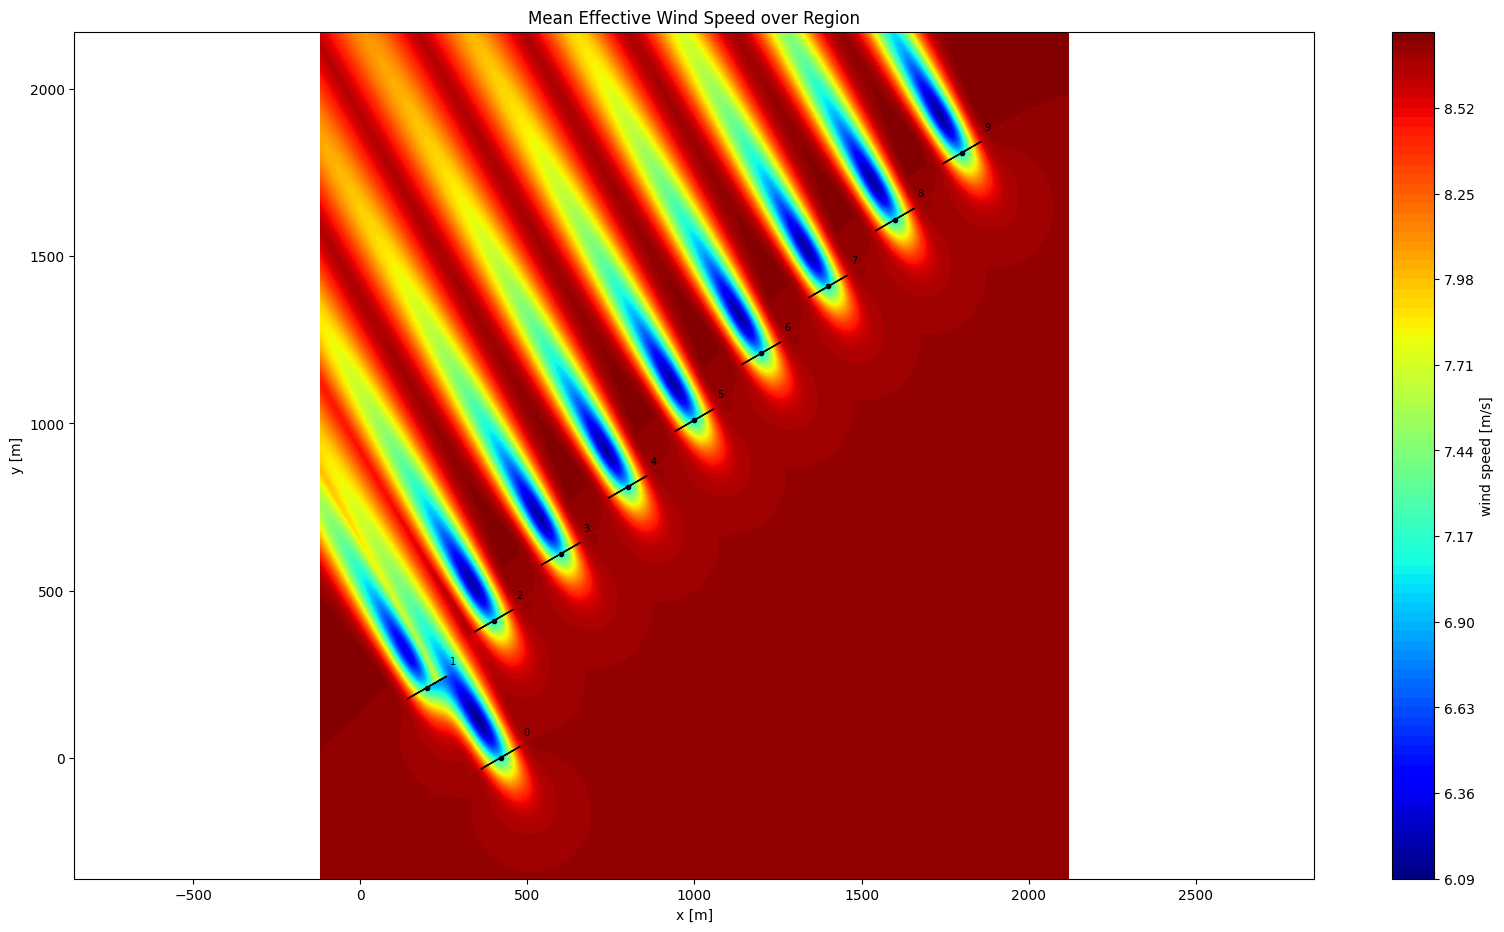

In [376]:
flow = simulaçaoResult.flow_map()
plt.figure(figsize=(20, 11))
flow.plot_wake_map(cmap='jet')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Mean Effective Wind Speed over Region')
plt.show()

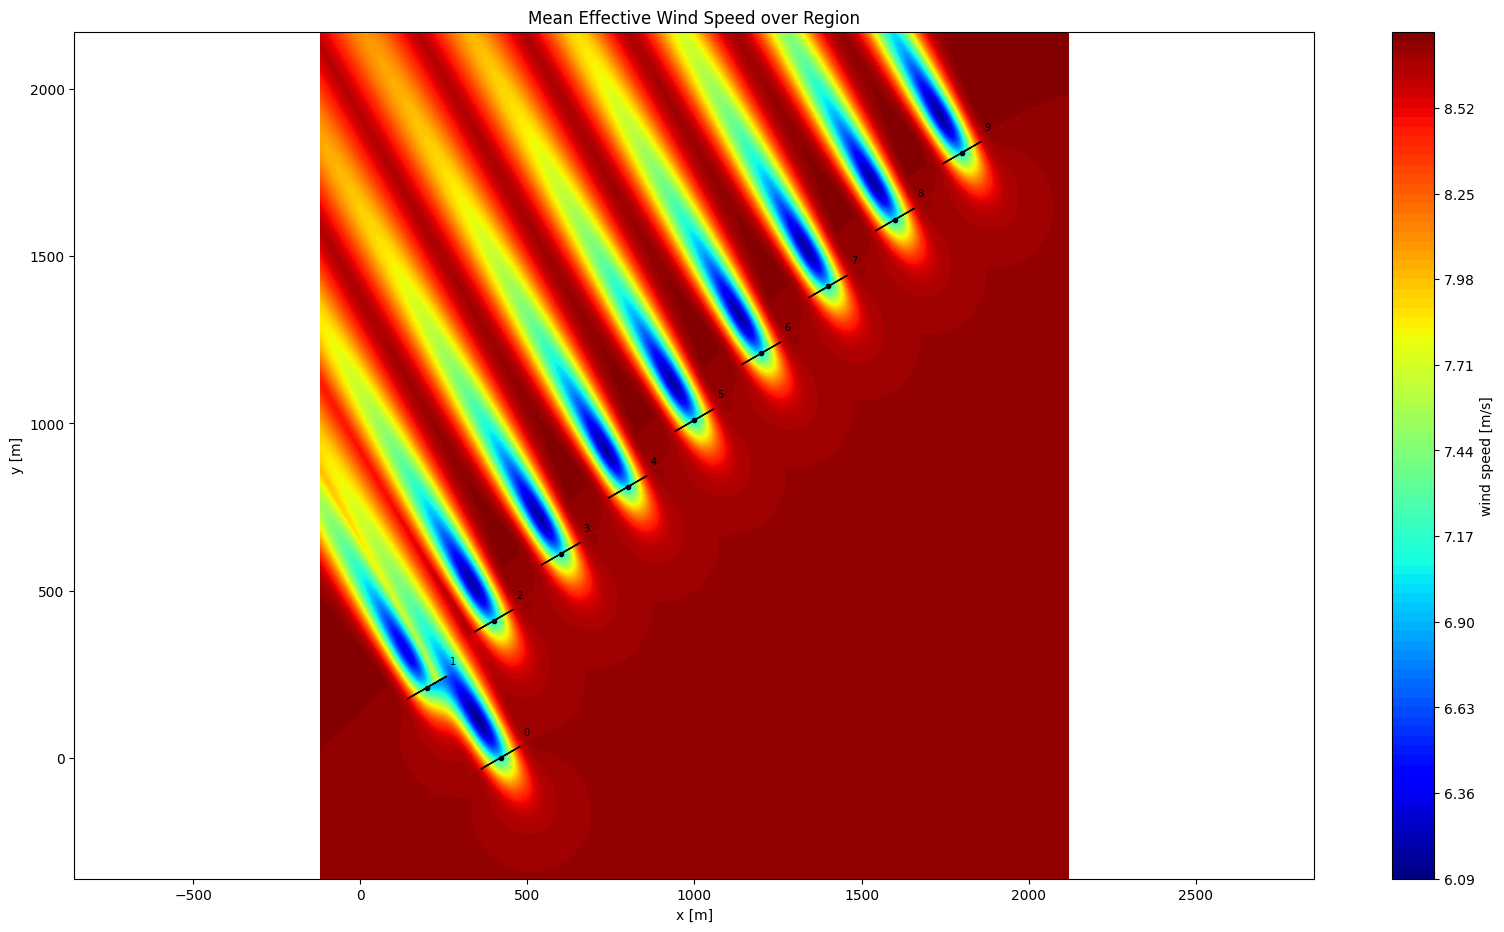

In [377]:
flow = simulacao.flow_map()
plt.figure(figsize=(20, 11))
flow.plot_wake_map(cmap='jet')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Mean Effective Wind Speed over Region')
plt.show()